In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# Add parent directory to path to import from sibling directories
sys.path.insert(0, str(Path().resolve().parent))

from dataset.cifar10 import load_cifar10, CIFAR10_CLASSES

# Load CIFAR-10 data
# For softmax, we typically use flattened images (each image as a feature vector)
# and normalize the pixel values to [0, 1]
X_train, y_train, X_test, y_test = load_cifar10(flatten_images=True, normalize=True)

print(f"Training set: {X_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Test labels: {y_test.shape}")
print(f"Number of classes: {len(CIFAR10_CLASSES)}")
print(f"Class names: {CIFAR10_CLASSES}")


✓ Found existing CIFAR-10 data at: C:\Users\vrpia\OneDrive\Documents\cs231n-deep-learning-for-computer-vision\code\dataset\cifar10\data\cifar-10-batches-py
  Using existing dataset files (no download needed).
Loaded CIFAR-10 dataset:
  Training set: 50000 images, shape (50000, 3072)
  Test set: 10000 images, shape (10000, 3072)
Training set: (50000, 3072)
Training labels: (50000,)
Test set: (10000, 3072)
Test labels: (10000,)
Number of classes: 10
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


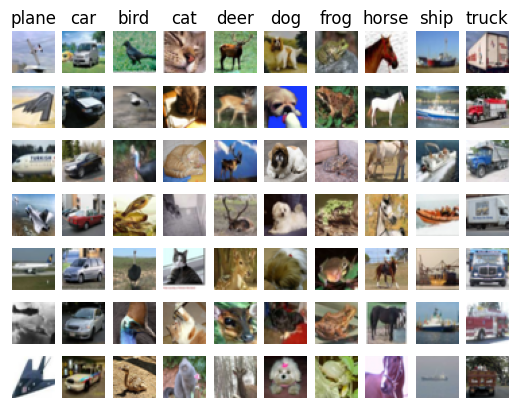

In [5]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7

# Reshape function to convert flattened image (3072,) back to (32, 32, 3)
def reshape_image(flat_image):
    """Reshape a flattened CIFAR-10 image (3072,) back to (32, 32, 3)"""
    # CIFAR-10 stores images as RRR...GGG...BBB (row-major order)
    # Reshape from (3072,) to (3, 32, 32)
    image = flat_image.reshape(3, 32, 32)
    # Transpose to (32, 32, 3) - channels last format
    image = image.transpose(1, 2, 0)
    return image

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        # Reshape the flattened image and display
        # Since data is normalized to [0, 1], we need to clip and use proper range
        image = reshape_image(X_train[idx])
        plt.imshow(np.clip(image, 0, 1))  # imshow expects [0, 1] for float images
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [6]:
from numpy import ma


num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500



mask = range(num_training, num_training+num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


[0.51232    0.5100241  0.51357174 0.515628   0.51801956 0.5206599
 0.52272356 0.5247841  0.527116   0.528832  ]


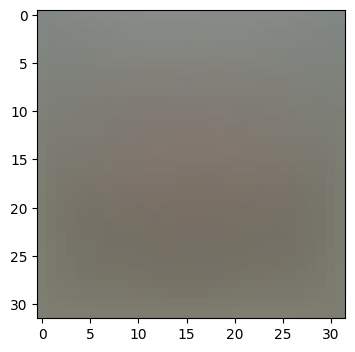

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [ ]:
mean_image = np.mean(X_train, axis = 0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(reshape_image(mean_image)) # visualize the mean image
plt.show()

# center the images
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

# third: append the bias dimension of ones (i.e. bias trick) so that our classifier
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

In [15]:
W = np.random.randn(3073, 10) * 0.0001

In [36]:

loss = 0.0
dW = np.zeros_like(W)

scores = X_dev @ W
print('Raw scores:', scores)
scores -= np.max(scores)
p = np.exp(scores)
p /= p.sum(axis=0)
print('Probabilities:', p.shape)
print(p[1])
logp = np.log(p)
print(logp.shape)

print(-logp[np.arange(len(y_dev)), y_dev].sum())
print(logp[np.arange(len(y_dev)), y_dev].shape)




Raw scores: [[ 5.93106209e-05  2.91759053e-04 -2.39658708e-03 ...  8.91435341e-04
   1.10181204e-03 -3.51447109e-03]
 [-8.29907329e-05 -1.15118767e-03  9.39764093e-05 ... -8.36523334e-04
  -7.51613528e-04 -2.69782040e-04]
 [ 4.24646358e-04  3.49043413e-06  8.62263699e-05 ... -2.91556397e-04
  -1.14987979e-03 -6.59250674e-04]
 ...
 [ 1.51036552e-06  3.12696995e-04  8.17972994e-04 ...  4.40270303e-04
   1.24145146e-03  6.59466236e-05]
 [ 6.26444911e-04 -7.45281041e-04 -6.67620330e-04 ... -2.19512612e-03
  -3.27164510e-04  1.27855864e-03]
 [ 1.93538352e-05  1.77989863e-04  6.42225695e-04 ...  5.97013732e-04
  -3.44121979e-04 -4.44844064e-04]]
Probabilities: (500, 10)
[0.00199941 0.00199787 0.00200025 0.00199999 0.00200094 0.00199971
 0.00199859 0.00199841 0.0019983  0.0019991 ]
(500, 10)
3107.356429796701
(500,)
